[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Linear_SVM_to_regression.ipynb)

In [0]:

import jupyterthemes as jt
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')


In [0]:
sess = tf.Session()

In [0]:
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [0]:
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [0]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [0]:
epsilon = tf.constant([0.5])
# Margin term in loss
loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [0]:
my_opt = tf.train.GradientDescentOptimizer(0.075)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
train_loss = []
test_loss = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_train_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    
    temp_test_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    if (i+1)%50==0:
        print('-----------')
        print('Generation: ' + str(i+1))
        print('A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Train Loss = ' + str(temp_train_loss))
        print('Test Loss = ' + str(temp_test_loss))

-----------
Generation: 50
A = [[1.9028704]] b = [[3.2897596]]
Train Loss = 0.38348225
Test Loss = 0.37902406
-----------
Generation: 100
A = [[1.4054708]] b = [[4.0757594]]
Train Loss = 0.14866155
Test Loss = 0.14281498
-----------
Generation: 150
A = [[1.2238207]] b = [[4.4267597]]
Train Loss = 0.09959063
Test Loss = 0.10947313
-----------
Generation: 200
A = [[1.0858208]] b = [[4.608261]]
Train Loss = 0.084698364
Test Loss = 0.088661894


In [0]:
# Extract Coefficients
[[slope]] = sess.run(A)
[[y_intercept]] = sess.run(b)
[width] = sess.run(epsilon)

# Get best fit line
best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)
  best_fit_upper.append(slope*i+y_intercept+width)
  best_fit_lower.append(slope*i+y_intercept-width)

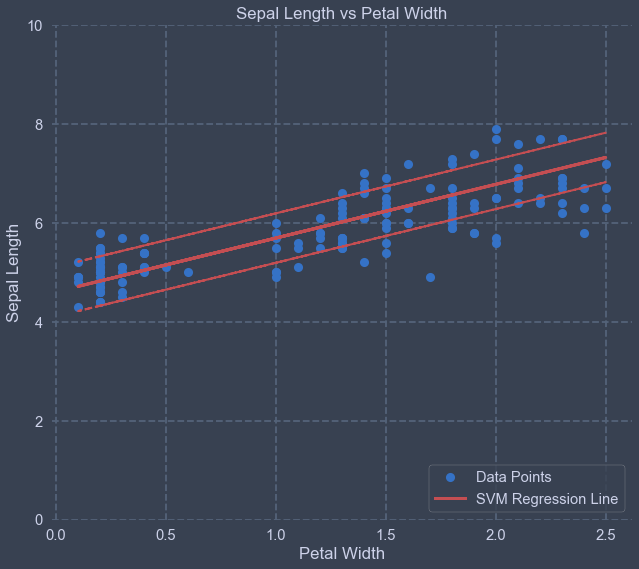

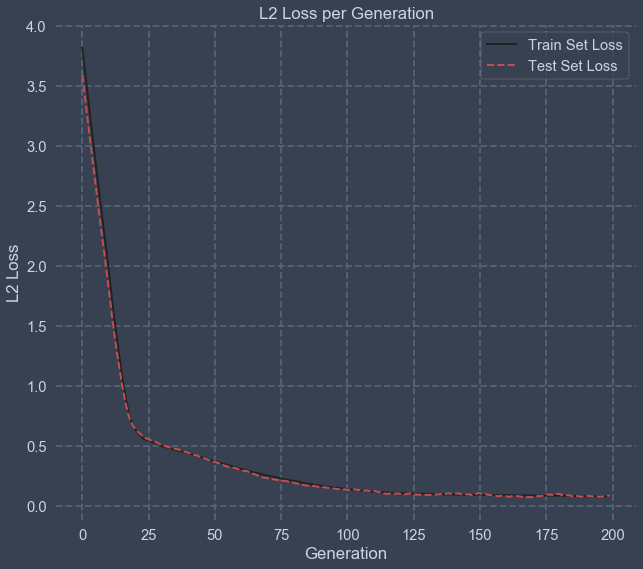

In [0]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(train_loss, 'k-', label='Train Set Loss')
plt.plot(test_loss, 'r--', label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()